In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import ensemble
import lightgbm as lgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 実験
真の関数  
$y\_true = \frac{x}{2} + 2$  

訓練データ作成用の関数  
$y\_randn = \frac{x}{2} + 2 + ε$  

In [2]:
y_true = lambda x: x / 2 + 2
y_randn = lambda x: y_true(x) + np.random.rand(x.shape[0]) / 4

## 訓練データの作成
０～５の一様分布の訓練データを作成

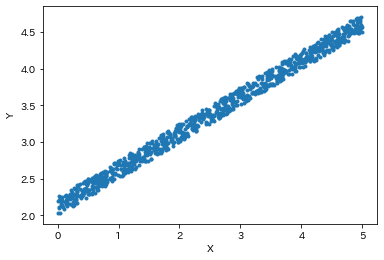

In [3]:
x_train = np.random.rand(1000) * 5
y_train = y_randn(x_train)

plt.scatter(x_train, y_train, marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 線形回帰で学習

In [4]:
LR = linear_model.LinearRegression()
_ = LR.fit(x_train.reshape(-1, 1), y_train)

## RandomForestで学習

In [5]:
RF = ensemble.RandomForestRegressor()
_ = RF.fit(x_train.reshape(-1, 1), y_train)

## LightGBMのGBDTで学習

In [6]:
params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
}
lgb_train = lgb.Dataset(x_train.reshape(-1, 1), y_train)
GBM = lgb.train(params, lgb_train)

## 学習結果の確認  
学習には０～５のデータを利用しました。  
－３～８のデータを入力して、学習結果をみてみます。

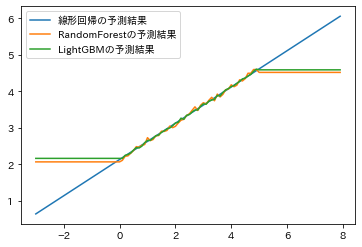

In [7]:
x_test = np.arange(-3,8, 0.1).reshape(-1,1)

lr_predict = LR.predict(x_test)
gbm_predict = GBM.predict(x_test)
rf_predict = RF.predict(x_test)

plt.plot(x_test, lr_predict, label='線形回帰の予測結果')
plt.plot(x_test, rf_predict, label='RandomForestの予測結果')
plt.plot(x_test, gbm_predict, label='LightGBMの予測結果')
plt.legend(loc='upper left')
plt.show()

線形回帰のモデルは０～５の範囲外でも真の関数とほぼ同じ値を予測しています。  
一方、RandomForestやLightGBMのモデルは０～５の範囲外では一定の値を予測しています。

木構造は未知の数値に対応できません。

## 分布が二つに分かれている場合

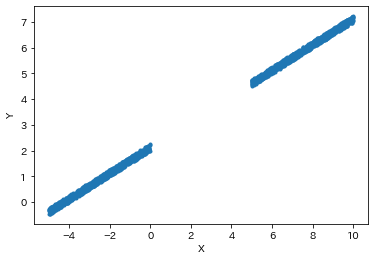

In [14]:
x_train_1 = np.random.rand(1000) * 5 - 5
y_train_1 = y_randn(x_train_1)

x_train_2 = np.random.rand(1000) * 5 + 5
y_train_2 = y_randn(x_train_2)

x_train = np.concatenate([x_train_1, x_train_2])
y_train = np.concatenate([y_train_1, y_train_2])

plt.scatter(x_train, y_train, marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

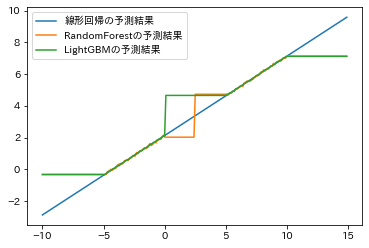

In [17]:
LR = linear_model.LinearRegression()
_ = LR.fit(x_train.reshape(-1, 1), y_train)
RF = ensemble.RandomForestRegressor()
_ = RF.fit(x_train.reshape(-1, 1), y_train)
params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
}
lgb_train = lgb.Dataset(x_train.reshape(-1, 1), y_train)
GBM = lgb.train(params, lgb_train)

x_test = np.arange(-10,15, 0.1).reshape(-1,1)

lr_predict = LR.predict(x_test)
gbm_predict = GBM.predict(x_test)
rf_predict = RF.predict(x_test)

plt.plot(x_test, lr_predict, label='線形回帰の予測結果')
plt.plot(x_test, rf_predict, label='RandomForestの予測結果')
plt.plot(x_test, gbm_predict, label='LightGBMの予測結果')
plt.legend(loc='upper left')
plt.show()